# Implementing L1 and L2 regularization using Sklearn

https://www.geeksforgeeks.org/ml-implementing-l1-and-l2-regularization-using-sklearn/

Prerequisites: L2 and L1 regularization

This article aims to implement the L2 and L1 regularization for Linear regression using the Ridge and Lasso modules of the Sklearn library of Python.

Dataset – House prices dataset .

In [ ]:
!wget https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv

--2021-04-24 12:47:08--  https://raw.githubusercontent.com/Shreyas3108/house-price-prediction/master/kc_house_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2515206 (2.4M) [text/plain]
Saving to: ‘kc_house_data.csv’

kc_house_data.csv   100%[===================>]   2.40M  --.-KB/s    in 0.1s    

2021-04-24 12:47:09 (18.5 MB/s) - ‘kc_house_data.csv’ saved [2515206/2515206]



Step 1: Importing the required libraries

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, cross_val_score 
from statistics import mean 
from sklearn import preprocessing

Step 2: Loading and cleaning the Data

In [ ]:
# Changing the working location to the location of the data 

# Loading the data into a Pandas DataFrame 
data = pd.read_csv('kc_house_data.csv') 

In [ ]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [ ]:
data.shape

(21613, 21)

In [ ]:
# Dropping the numerically non-sensical variables 
dropColumns = ['id', 'date', 'zipcode'] 
data = data.drop(dropColumns, axis = 1) 
data = data[0:1000]

# Separating the dependent and independent variables 
y = data['price'] 
X = data.drop('price', axis = 1) 

#x = X.values #returns a numpy array
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(x)
#X = pd.DataFrame(x_scaled)

# Dividing the data into training and testing set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25) 

In [ ]:
X.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,3.349000,2.045750,2051.196000,14702.085000,1.446500,0.008000,0.237000,3.464000,7.60600,1750.333000,300.863000,1969.049000,81.74900,47.549493,-122.207472,1987.077000,13496.874000
std,0.852012,0.721623,887.929222,28961.030775,0.517354,0.089129,0.765125,0.689332,1.16022,790.077476,450.898196,28.190873,395.57825,0.141670,0.139509,670.439353,25093.829486
min,0.000000,0.000000,380.000000,649.000000,1.000000,0.000000,0.000000,1.000000,4.00000,380.000000,0.000000,1900.000000,0.00000,47.177500,-122.490000,830.000000,660.000000
25%,3.000000,1.500000,1407.500000,5428.500000,1.000000,0.000000,0.000000,3.000000,7.00000,1190.000000,0.000000,1952.000000,0.00000,47.442875,-122.322250,1490.000000,5404.500000
50%,3.000000,2.000000,1900.000000,8045.000000,1.000000,0.000000,0.000000,3.000000,7.00000,1540.000000,0.000000,1974.000000,0.00000,47.563500,-122.218000,1850.000000,7995.000000
75%,4.000000,2.500000,2472.500000,11489.250000,2.000000,0.000000,0.000000,4.000000,8.00000,2132.500000,580.000000,1992.000000,0.00000,47.673400,-122.118000,2360.000000,10403.000000
max,7.000000,5.000000,6070.000000,315374.000000,3.500000,1.000000,4.000000,5.000000,12.00000,6070.000000,2060.000000,2015.000000,2014.00000,47.777600,-121.709000,4760.000000,233971.000000


Step 3: Building and evaluating the different models

a) Linear Regression:

In [ ]:
# Bulding and fitting the Linear Regression model 
linearModel = LinearRegression() 
linearModel.fit(X_train, y_train) 

# Evaluating the Linear Regression model 
print(linearModel.score(X_train, y_train)) 
print(linearModel.score(X_test, y_test)) 

0.7353027781854686
0.6394356839702168


b) Ridge(L2) Regression:

In [ ]:
# List to maintain the different cross-validation scores 
cross_val_scores_ridge = [] 

# List to maintain the different values of alpha 
alpha = [] 
# Loop to compute the different values of cross-validation scores 
for i in range(-3, 3): 
	ridgeModel = Ridge(alpha = 10**(-i)) 
	ridgeModel.fit(X_train, y_train) 
	scores = cross_val_score(ridgeModel, X, y, cv = 10) 
	avg_cross_val_score = mean(scores)*100
	cross_val_scores_ridge.append(avg_cross_val_score) 
	alpha.append(10**(-i)) 

# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
	print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i])) 


1000 : 59.66500880082617
100 : 64.47048672957649
10 : 68.479528074744
1 : 69.70370353668177
0.1 : 69.53735661949966
0.01 : 69.50521414978054


In [ ]:
# List to maintain the different cross-validation scores 
cross_val_scores_ridge = [] 

# List to maintain the different values of alpha 
alpha = [] 

# Loop to compute the different values of cross-validation scores 
for i in range(1, 9): 
	ridgeModel = Ridge(alpha = i * 0.25) 
	ridgeModel.fit(X_train, y_train) 
	scores = cross_val_score(ridgeModel, X, y, cv = 10) 
	avg_cross_val_score = mean(scores)*100
	cross_val_scores_ridge.append(avg_cross_val_score) 
	alpha.append(i * 0.25) 

# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
	print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i])) 


0.25 : 69.58319612284247
0.5 : 69.6411188378246
0.75 : 69.68003797194939
1.0 : 69.70370353668177
1.25 : 69.71504320492447
1.5 : 69.71636652168027
1.75 : 69.70951254659924
2.0 : 69.6959581425075


In [ ]:
# Building and fitting the Ridge Regression model 
ridgeModelChosen = Ridge(alpha = 1.5) 
ridgeModelChosen.fit(X_train, y_train) 

# Evaluating the Ridge Regression model 

print(ridgeModelChosen.score(X_train, y_train)) 
print(ridgeModelChosen.score(X_test, y_test)) 

0.7326360701243873
0.6595529000248797


c) Lasso(L1) Regression:

In [ ]:
# List to maintain the cross-validation scores 
cross_val_scores_lasso = [] 

# List to maintain the different values of Lambda 
Lambda = [] 

# Loop to compute the cross-validation scores 
for i in range(-3, 3): 
	lassoModel = Lasso(alpha = 10**(-i), tol = 0.0925) 
	lassoModel.fit(X_train, y_train) 
	scores = cross_val_score(lassoModel, X, y, cv = 10) 
	avg_cross_val_score = mean(scores)*100
	cross_val_scores_lasso.append(avg_cross_val_score) 
	Lambda.append(10**(-i)) 

# Loop to print the different values of cross-validation scores 
for i in range(-3,3): 
	print(str(10**(-i))+' : '+str(cross_val_scores_lasso[i])) 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 13728372092491.691, tolerance: 9157626018377.758
  positive)


1000 : 69.50196203208064
100 : 69.50146567359988
10 : 69.50141601240807
1 : 69.60518608218402
0.1 : 69.5522925898255
0.01 : 69.50690065161872


In [ ]:
# List to maintain the cross-validation scores 
cross_val_scores_lasso = [] 

# List to maintain the different values of Lambda 
Lambda = [] 

# Loop to compute the cross-validation scores 
for i in range(1, 9): 
	lassoModel = Lasso(alpha = i * 0.25, tol = 0.0925) 
	lassoModel.fit(X_train, y_train) 
	scores = cross_val_score(lassoModel, X, y, cv = 10) 
	avg_cross_val_score = mean(scores)*100
	cross_val_scores_lasso.append(avg_cross_val_score) 
	Lambda.append(i * 0.25) 

# Loop to print the different values of cross-validation scores 
for i in range(0, len(alpha)): 
	print(str(i * 0.25)+' : '+str(cross_val_scores_lasso[i])) 

0.0 : 69.50154842987843
0.25 : 69.50168633414087
0.5 : 69.50182420312663
0.75 : 69.50196203208064
1.0 : 69.50209983021243
1.25 : 69.50223759724412
1.5 : 69.50237531545588
1.75 : 69.50251302080225


In [ ]:
# Building and fitting the Lasso Regression Model 
lassoModelChosen = Lasso(alpha = 10, tol = 0.0925) 
lassoModelChosen.fit(X_train, y_train) 
# Evaluating the Lasso Regression model 
print(lassoModelChosen.score(X_train, y_train)) 
print(lassoModelChosen.score(X_test, y_test)) 


0.7353025215741897
0.6396786729454891


In [ ]:
linearModel.coef_

array([-1.44497950e+04,  1.38496743e+04,  8.81349435e+01,  4.24802063e-01,
        2.88113523e+04,  8.87210782e+05,  6.43304633e+04,  2.05015788e+04,
        8.81853360e+04,  4.31976478e+01,  4.49372956e+01, -2.69167977e+03,
        8.00126785e+01,  5.37085269e+05,  3.93648814e+04,  6.76972833e+01,
       -9.76703943e-01])

In [ ]:
ridgeModelChosen.coef_

array([-1.69560604e+04,  1.61221198e+04,  8.84305805e+01,  4.19317845e-01,
        2.97623623e+04,  6.77706772e+05,  7.30587860e+04,  2.00900060e+04,
        8.83034078e+04,  4.13687763e+01,  4.70617452e+01, -2.75368988e+03,
        7.84571316e+01,  4.77693573e+05,  2.40789126e+04,  7.06420110e+01,
       -8.99591597e-01])

In [ ]:
lassoModelChosen.coef_

array([-1.44480410e+04,  1.38197065e+04,  2.51658730e+02,  4.24901474e-01,
        2.87521576e+04,  8.85696280e+05,  6.43576268e+04,  2.04672398e+04,
        8.81534115e+04, -1.20284561e+02, -1.18576949e+02, -2.69008703e+03,
        8.00157449e+01,  5.36466956e+05,  3.83579451e+04,  6.77899156e+01,
       -9.75336607e-01])

In [ ]:
np.sum(abs(0-linearModel.coef_))

1696806.1928659773

In [ ]:
np.sum(abs(0-ridgeModelChosen.coef_)) 

1426852.9686242014

In [ ]:
np.sum(abs(0-lassoModelChosen.coef_)) 

1693849.177891887

Step 4: Comparing and Visualizing the results

In [ ]:
# Building the two lists for visualization 
models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression'] 
scores = [linearModel.score(X_test, y_test), 
		ridgeModelChosen.score(X_test, y_test), 
		lassoModelChosen.score(X_test, y_test)] 

# Building the dictionary to compare the scores 
mapping = {} 
mapping['Linear Regreesion'] = linearModel.score(X_test, y_test) 
mapping['Ridge Regreesion'] = ridgeModelChosen.score(X_test, y_test) 
mapping['Lasso Regression'] = lassoModelChosen.score(X_test, y_test) 

# Printing the scores for different models 
for key, val in mapping.items(): 
	print(str(key)+' : '+str(val)) 


Linear Regreesion : 0.6394356839702168
Ridge Regreesion : 0.6595529000248797
Lasso Regression : 0.6396786729454891


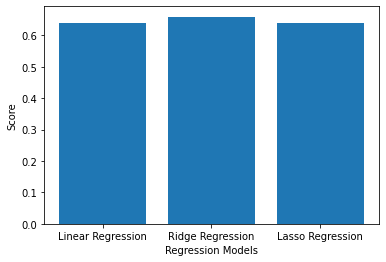

In [ ]:
# Plotting the scores 
plt.bar(models, scores) 
plt.xlabel('Regression Models') 
plt.ylabel('Score') 
plt.show() 
